**EXPORT ZIP DATASET AND CREATE DIRECTORY FOR EACH CATEGORIZE OF MEATFRESHNESS**

In [1]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./MeatFreshness.zip", 'r')
zip_ref.extractall('tmp')

zip_ref.close()

# Directory with training fresh meat pictures
train_meat_dir = os.path.join('tmp/MeatFreshness/Training')
train_frmeat_dir = os.path.join('tmp/MeatFreshness/Training/Fresh')
# Directory with training half fresh meat pictures
train_hfmeat_dir = os.path.join('tmp/MeatFreshness/Training/HalfFresh')
# Directory with training spoiled meat pictures
train_spmeat_dir = os.path.join('tmp/MeatFreshness/Training/Spoiled')
# Directory with training not meat pictures 
train_notmeat_dir = os.path.join('tmp/MeatFreshness/Training/NotValidImage')

# Directory with validation fresh meat pictures
val_meat_dir = os.path.join('tmp/MeatFreshness/Validation')
val_frmeat_dir = os.path.join('tmp/MeatFreshness/Validation/Fresh')
# Directory with validation half fresh meat pictures
val_hfmeat_dir = os.path.join('tmp/MeatFreshness/Validation/HalfFresh')
# Directory with validation spoiled meat pictures
val_spmeat_dir = os.path.join('tmp/MeatFreshness/Validation/Spoiled')
# Directory with validation not meat pictures 
val_notmeat_dir = os.path.join('tmp/MeatFreshness/Validation/NotValidImage')
     

**DISTRIBUTE IMAGES TO FOLDERS ACCORDING TO THEIR CLASSES**

In [2]:
train_frmeat = os.listdir(train_frmeat_dir)
print(train_frmeat[:10])

train_hfmeat = os.listdir(train_hfmeat_dir)
print(train_hfmeat[:10])

train_spmeat = os.listdir(train_spmeat_dir)
print(train_spmeat[:10])

train_notmeat = os.listdir(train_notmeat_dir)
print(train_notmeat[:10])

val_frmeat = os.listdir(val_frmeat_dir)
print(val_frmeat[:10])

val_hfmeat = os.listdir(val_hfmeat_dir)
print(val_hfmeat[:10])

val_spmeat = os.listdir(val_spmeat_dir)
print(val_spmeat[:10])

val_notmeat = os.listdir(val_notmeat_dir)
print(val_notmeat[:10])

['FRESH-149-_JPG.rf.38eb0713ff7c46446022a7cff2a08f63.jpg', 'FRESH-1000-_JPG.rf.d0f18a5c4075b50beeb7ee99036d491d.jpg', 'FRESH-961-_JPG.rf.8f6ea9099088cd166f2a02e070754a9c.jpg', 'FRESH-72-_JPG.rf.33be8858309837e0f9b37485d9a79254.jpg', 'FRESH-280-_JPG.rf.a1b14f32b372a3c36248380cd6ea4d4f.jpg', 'FRESH-875-_JPG.rf.2212570dfcdd9142fe026530e4a50217.jpg', 'FRESH-307-_JPG.rf.f5319881bc051aefd95037752a9f334e.jpg', 'FRESH-475-_JPG.rf.5a89ca7d628a40b0f8459d985c98a941.jpg', 'FRESH-303-_JPG.rf.b0e4b3896a54e115d5c6d79a14e360d8.jpg', 'FRESH-934-_JPG.rf.b2c34710e8608558e03d013ee7f38b75.jpg']
['HALF-FRESH-699-_JPG.rf.d4bf6d2419cf8d355dd26c1b18ef81d6.jpg', 'HALF-FRESH-2-_JPG.rf.80cb55a3cc582bd2d3929d23eb31bed1.jpg', 'HALF-FRESH-737-_JPG.rf.c055019b199602295250938b0c83a8e8.jpg', 'HALF-FRESH-188-_JPG.rf.13e42652b25dbce61b8ddadd707a5d95.jpg', 'HALF-FRESH-85-_JPG.rf.47062c0607dc05e07053fbdd5ac2486e.jpg', 'HALF-FRESH-287-_JPG.rf.62293364cbf5b254b78fa93a39d55aa6.jpg', 'HALF-FRESH-233-_JPG.rf.738478d7d910805e20b

In [3]:
print('total training fresh meat images:', len(os.listdir(train_frmeat_dir)))
print('total training half fresh meat images:', len(os.listdir(train_hfmeat_dir)))
print('total training spoiled meat images: ', len(os.listdir(train_spmeat_dir)))
print('total training not meat images: ', len(os.listdir(train_notmeat_dir)))
print('\n')
print('total validation fresh meat images:', len(os.listdir(val_frmeat_dir)))
print('total validation half fresh meat images:', len(os.listdir(val_hfmeat_dir)))
print('total validation spoiled meat images:', len(os.listdir(val_spmeat_dir)))
print('total validation not meat images: ', len(os.listdir(val_notmeat_dir)))

total training fresh meat images: 675
total training half fresh meat images: 630
total training spoiled meat images:  510
total training not meat images:  600


total validation fresh meat images: 178
total validation half fresh meat images: 159
total validation spoiled meat images: 114
total validation not meat images:  202


In [4]:
from pathlib import Path

# Create a list with the filepaths for training and testing
train_dir = Path('/content/tmp/MeatFreshness/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/tmp/MeatFreshness/Validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [5]:
 #Create a DataFrame with the filepath and the labels of the pictures
import numpy as np
import pandas as pd

def image_processing(filepath):
  
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath')
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [6]:
train_df = image_processing(train_filepaths)
val_df = image_processing(val_filepaths)

In [7]:
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

Number of different labels: 4

Labels: ['Spoiled' 'Fresh' 'NotValidImage' 'HalfFresh']


In [8]:
train_df.head(5)

,Filepath,Label
0,/content/tmp/MeatFreshness/Training/Spoiled/SP...,Spoiled
1,/content/tmp/MeatFreshness/Training/Fresh/FRES...,Fresh
2,/content/tmp/MeatFreshness/Training/Fresh/FRES...,Fresh
3,/content/tmp/MeatFreshness/Training/NotValidIm...,NotValidImage
4,/content/tmp/MeatFreshness/Training/NotValidIm...,NotValidImage


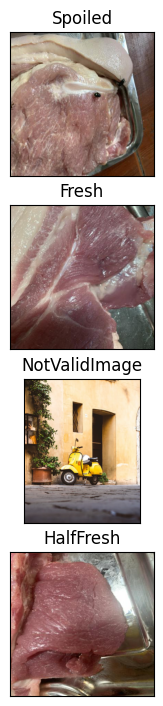

In [9]:
import matplotlib.pyplot as plt

# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

**PREPROCESSING OF THE IMAGE**

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [11]:
# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory('tmp/MeatFreshness/Training', 
                                                    target_size=(150, 150),  # All images will be resized to 150x150
                                                    batch_size=32,
                                                    seed=42,
                                                    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory('tmp/MeatFreshness/Validation',
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      seed=42,
                                                      class_mode='categorical',
                                                      shuffle=False
)

Found 2415 images belonging to 4 classes.
Found 653 images belonging to 4 classes.


**BUILD THE MODEL**

In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ["accuracy"])

In [19]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.93:                 
                print("\nReached 93% accuracy so cancelling training!")
                
                # Stop training once the above condition is met
                self.model.stop_training = True

callbacks = myCallback()

In [20]:
history = model.fit(
      train_generator,  
      epochs=85,
      batch_size=32,
      validation_data = validation_generator,
      callbacks = [callbacks],
      verbose = 1)

Epoch 1/85
76/76 [==============================] - 155s 2s/step - loss: 1.0910 - accuracy: 0.4754 - val_loss: 0.8413 - val_accuracy: 0.6049
Epoch 2/85
76/76 [==============================] - 153s 2s/step - loss: 0.8350 - accuracy: 0.6066 - val_loss: 0.7609 - val_accuracy: 0.6248
Epoch 3/85
76/76 [==============================] - 144s 2s/step - loss: 0.7303 - accuracy: 0.6629 - val_loss: 0.7960 - val_accuracy: 0.6126
Epoch 4/85
76/76 [==============================] - 152s 2s/step - loss: 0.6913 - accuracy: 0.6700 - val_loss: 0.6633 - val_accuracy: 0.6845
Epoch 5/85
76/76 [==============================] - 144s 2s/step - loss: 0.6426 - accuracy: 0.7106 - val_loss: 0.7033 - val_accuracy: 0.6600
Epoch 6/85
76/76 [==============================] - 152s 2s/step - loss: 0.5802 - accuracy: 0.7379 - val_loss: 0.7136 - val_accuracy: 0.6784
Epoch 7/85
76/76 [==============================] - 151s 2s/step - loss: 0.5032 - accuracy: 0.7652 - val_loss: 0.4510 - val_accuracy: 0.7749
Epoch 8/85
76

Text(0.5, 1.0, 'Training and validation loss')

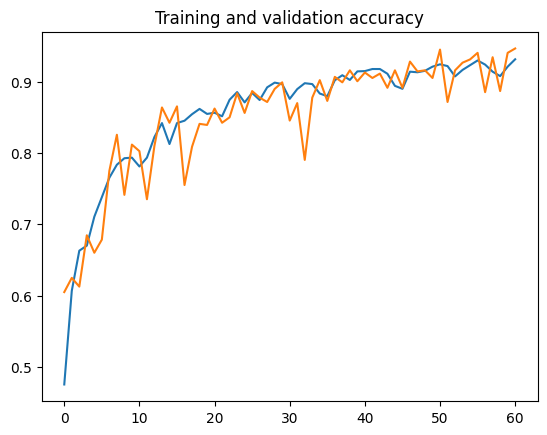

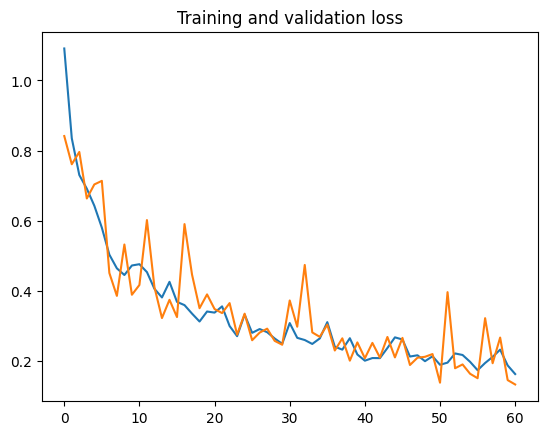

In [33]:
# Retrieve a list of list results on training and test data
# sets for each training epoch

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

#Exporting to TFLite

In [27]:
export_dir = 'saved_model/1'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

#Convert the Savedmodel to TFLite

In [28]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [30]:
import pathlib
tflite_model_file = pathlib.Path('MeatFreshness.tflite')
tflite_model_file.write_bytes(tflite_model)

2175500

#Download the TFLIte model

In [31]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>